In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] =12,8

In [3]:
from sklearn import datasets
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


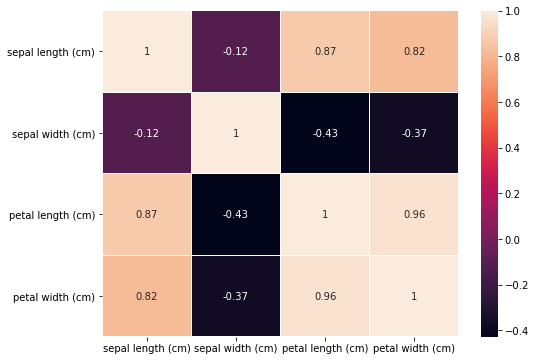

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,linewidths=0.2)

In [6]:
df.columns = ['sepal_length','sepal_width','petal_length','petal_width']

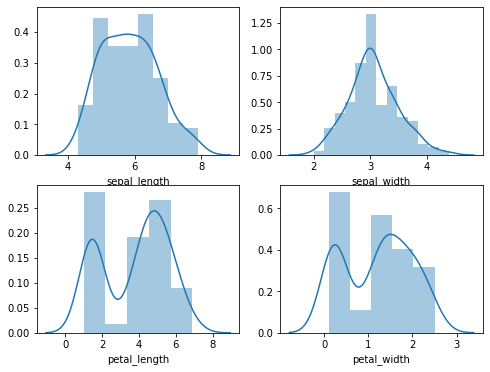

In [7]:
f,axes = plt.subplots(2,2,figsize=(8,6))   
k1=sns.distplot(df['sepal_length'],ax=axes[0,0])
k2=sns.distplot(df['sepal_width'],ax=axes[0,1])
k3=sns.distplot(df['petal_length'],ax=axes[1,0])
k4=sns.distplot(df['petal_width'],ax=axes[1,1])

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

In [9]:
x=df.iloc[:,[0,1,2,3]].values

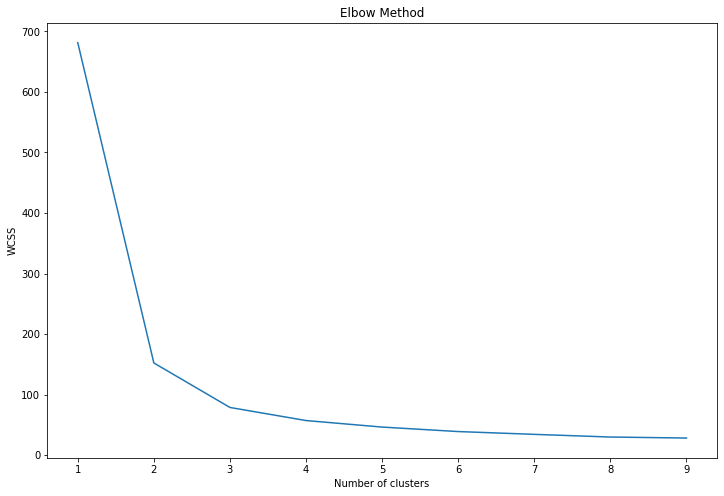

In [10]:
w=[]
for i in range(1,10):
    k=KMeans(init='k-means++',n_clusters=i,n_init=10,max_iter=200)
    k.fit(x)
    w.append(k.inertia_)
plt.plot(range(1, 10), w)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=20, random_state=0)
pred_y = kmeans.fit_predict(x)
kmeans.inertia_

78.851441426146

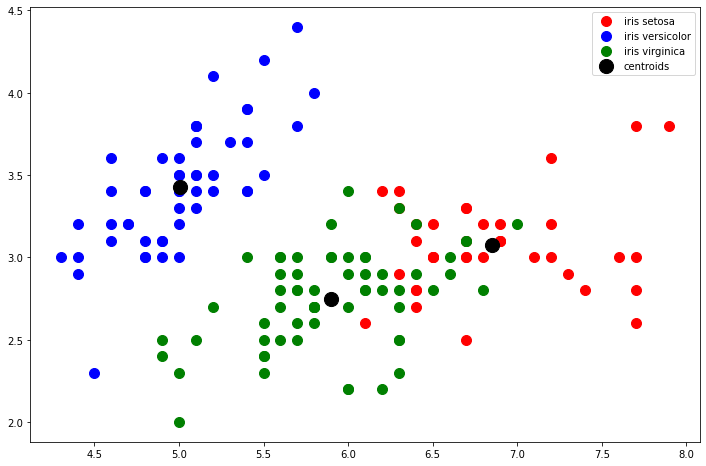

In [12]:
plt.scatter(x[pred_y == 0, 0] ,x[pred_y == 0, 1] ,s=100 ,c='red', label='iris setosa')
plt.scatter(x[pred_y == 1, 0] ,x[pred_y == 1, 1] ,s=100 ,c='blue', label='iris versicolor')
plt.scatter(x[pred_y == 2, 0] ,x[pred_y == 2, 1] ,s=100 ,c='green', label='iris virginica')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1] ,s=200 ,c='black', label='centroids')
plt.legend()